In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/contest_results.csv", parse_dates=["contest_date"])
df.loc[df["division"] == "women's wellness", "division"] = "wellness"

Let's look at the number of competitors at Mr Olympia in different years at different divisions.

In [4]:
div_groupby = df[
    (df["contest_name"] == "ifbb mr olympia") & (df["class"] == "open")
].groupby(["contest_date", "division"])

In [5]:
df_olymp_count = pd.DataFrame(div_groupby["competitor_name"].count()).reset_index()

In [6]:
df_olymp_count.head()

,contest_date,division,competitor_name
0,2014-09-18,212,14
1,2014-09-18,bikini,26
2,2014-09-18,figure,20
3,2014-09-18,fitness,12
4,2014-09-18,men's bodybuilding,17


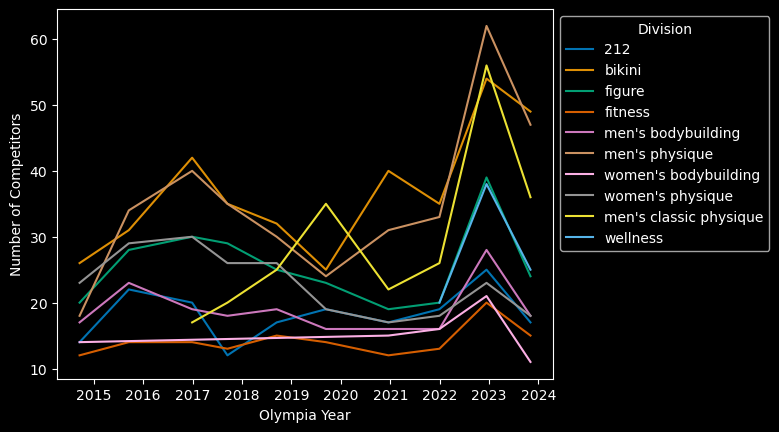

In [11]:
ax = sns.lineplot(
    data=df_olymp_count,
    x="contest_date",
    y="competitor_name",
    hue="division",
    palette="colorblind",
)
plt.xlabel("Olympia Year")
plt.ylabel("Number of Competitors")
plt.style.use("dark_background")
plt.legend(title="Division")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Let's import elo ratings that we computed in different notebook.

In [7]:
df_elo_adj = pd.read_csv(
    "data/contest_results_elo_adjusted.csv", parse_dates=["contest_date"], index_col=0
)

In [8]:
df_elo_adj["year"] = df_elo_adj["contest_date"].dt.year

In [40]:
df_elo_adj.head()

,organization,contest_name,contest_date,division,class,competitor_name,placing,elo_rating,elo_rank,year
17038,ifbb,ifbb flex pro,2012-02-18,fitness,open,adela garcia,1.0,1516.0,1.0,2012
17030,ifbb,ifbb flex pro,2012-02-18,fitness,open,allison ethier,9.0,1516.0,2.0,2012
17034,ifbb,ifbb flex pro,2012-02-18,fitness,open,bethany wagner,5.0,1516.0,3.0,2012
17031,ifbb,ifbb flex pro,2012-02-18,fitness,open,camala rodriguez,8.0,1516.0,4.0,2012
17033,ifbb,ifbb flex pro,2012-02-18,fitness,open,jodi boam,6.0,1516.0,5.0,2012


Let's look at the elo rating of 2023 Mr Olympia competition in the bikini division. 

In [9]:
df_olymp23b_elo = df_elo_adj[
    (df_elo_adj["contest_name"] == "ifbb mr olympia")
    & (df_elo_adj["year"] == 2023)
    & (df_elo_adj["class"] == "open")
    & (df_elo_adj["division"] == "bikini")
]

Text(0.5, 1.0, '2023 Ms. Olympia Bikini Elo Rating Distribution')

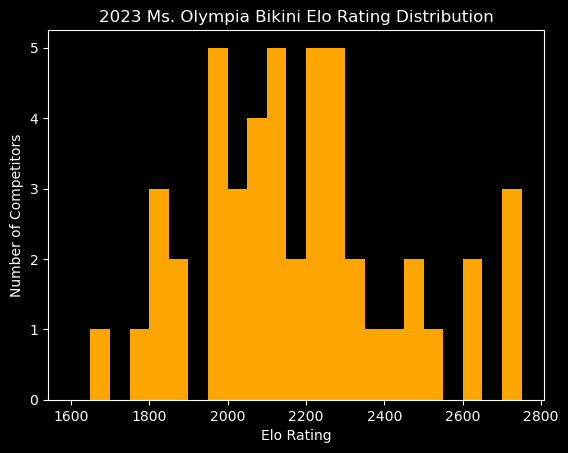

In [12]:
plt.hist(df_olymp23b_elo["elo_rating"], bins=range(1600, 2800, 50), color="orange")
plt.style.use("dark_background")
plt.xlabel("Elo Rating")
plt.ylabel("Number of Competitors")
plt.title("2023 Ms. Olympia Bikini Elo Rating Distribution")

Let's determine minimal elo rating among top 15 competitors.

In [13]:
df_olymp23b_elo.sort_values(by=["placing"], ascending=True).head(15)["elo_rating"].min()

2109.325765034716

Let's look in more details at the elo rating among competitors.

Text(0.5, 1.0, 'Elo Rating Distribution of 2023 Ms. Olympia Bikini Competitors')

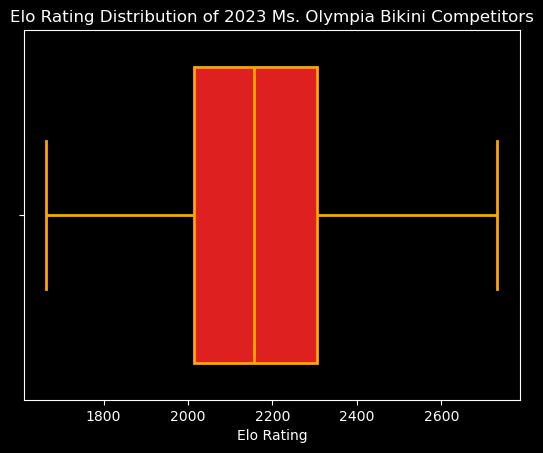

In [14]:
ax = sns.boxplot(
    x=df_olymp23b_elo["elo_rating"],
    fill=True,
    color="red",
    linecolor="orange",
    linewidth=2,
)
plt.xlabel("Elo Rating")
plt.title("Elo Rating Distribution of 2023 Ms. Olympia Bikini Competitors")

The numeraical values for the quantiles are given below.

In [15]:
df_olymp23b_elo["elo_rating"].quantile([0.25, 0.5, 0.75])

0.25    2014.809936
0.50    2156.460743
0.75    2304.543098
Name: elo_rating, dtype: float64

We will look at the recent performance of athletes with low elo ratings.

In [16]:
low_rank_names = df_olymp23b_elo[df_olymp23b_elo["elo_rating"] < 2014.8][
    "competitor_name"
].unique()

In [17]:
df_olymp23b_elo[df_olymp23b_elo["competitor_name"].isin(low_rank_names)]

,organization,contest_name,contest_date,division,class,competitor_name,placing,elo_rating,elo_rank,year
73481,ifbb,ifbb mr olympia,2023-11-03,bikini,open,amanda marques,16.0,1827.147500,45.0,2023
73482,ifbb,ifbb mr olympia,2023-11-03,bikini,open,areum song,16.0,1872.322121,43.0,2023
73483,ifbb,ifbb mr olympia,2023-11-03,bikini,open,brenda farias,16.0,1827.425269,44.0,2023
73484,ifbb,ifbb mr olympia,2023-11-03,bikini,open,dahye jeon,16.0,1874.926811,42.0,2023
73486,ifbb,ifbb mr olympia,2023-11-03,bikini,open,eszter ozcella,16.0,1767.000000,47.0,2023
73488,ifbb,ifbb mr olympia,2023-11-03,bikini,open,hyo jung kim,16.0,1805.618492,46.0,2023
73493,ifbb,ifbb mr olympia,2023-11-03,bikini,open,jibin park,16.0,1957.102287,41.0,2023
73494,ifbb,ifbb mr olympia,2023-11-03,bikini,open,jil meret schmitz,16.0,1664.984723,48.0,2023
73502,ifbb,ifbb mr olympia,2023-11-03,bikini,open,ottavia mazza,16.0,1982.849729,38.0,2023
73503,ifbb,ifbb mr olympia,2023-11-03,bikini,open,reyna perez mecalco,16.0,1972.981092,40.0,2023


In [18]:
df_elo_adj[
    (df_elo_adj["competitor_name"].isin(low_rank_names))
    & (df_elo_adj["organization"] == "ifbb")
    & (df_elo_adj["placing"] == 1)
    & (df_elo_adj["year"] >= 2021)
].sort_values("contest_date")

,organization,contest_name,contest_date,division,class,competitor_name,placing,elo_rating,elo_rank,year
58850,ifbb,ifbb monsterzym pro,2021-09-12,bikini,open,jibin park,1.0,1520.378714,6.0,2021
59077,ifbb,ifbb san antonio pro,2021-09-25,bikini,open,roxana marquez,1.0,1794.857909,10.0,2021
59162,ifbb,ifbb tsunami cup pro,2021-09-27,bikini,open,ottavia mazza,1.0,1882.075131,1.0,2021
61781,ifbb,ifbb thailand pro,2022-03-28,bikini,open,jil meret schmitz,1.0,1508.941547,7.0,2022
66698,ifbb,ifbb mexico grand battle pro,2022-10-24,bikini,open,reyna perez mecalco,1.0,1767.000000,8.0,2022
67847,ifbb,ifbb taiwan pro,2022-11-28,bikini,open,jibin park,1.0,1597.003601,6.0,2022
68324,ifbb,ifbb musclecontest campinas pro,2023-03-18,bikini,open,brenda farias,1.0,1767.000000,3.0,2023
68482,ifbb,ifbb agp south korea pro,2023-04-15,bikini,open,hyo jung kim,1.0,1776.507030,1.0,2023
69038,ifbb,ifbb tropicarium budapest pro,2023-05-13,bikini,open,zsofia reka molnar,1.0,1842.623853,5.0,2023
69953,ifbb,ifbb sheru classic india pro,2023-06-18,bikini,open,jil meret schmitz,1.0,1585.654353,8.0,2023


We see that these are still strong athletes, they recently won some competitions. Next we look at the athletes with high elo rating.

In [19]:
high_rank_names = df_olymp23b_elo[
    (df_olymp23b_elo["division"] == "bikini")
    & (df_olymp23b_elo["elo_rating"] > 2304.5)
]["competitor_name"].unique()

We look at the quality of placing prediction using elo rating.

In [20]:
df_olymp23b_elo[
    df_olymp23b_elo["competitor_name"].isin(high_rank_names)
].sort_values("placing")

,organization,contest_name,contest_date,division,class,competitor_name,placing,elo_rating,elo_rank,year
73527,ifbb,ifbb mr olympia,2023-11-03,bikini,open,jennifer dorie,1.0,2732.674575,1.0,2023
73526,ifbb,ifbb mr olympia,2023-11-03,bikini,open,maureen blanquisco,2.0,2639.491939,4.0,2023
73525,ifbb,ifbb mr olympia,2023-11-03,bikini,open,ashley kaltwasser,3.0,2707.602024,3.0,2023
73524,ifbb,ifbb mr olympia,2023-11-03,bikini,open,lauralie chapados,4.0,2707.872765,2.0,2023
73523,ifbb,ifbb mr olympia,2023-11-03,bikini,open,elisa pecini,5.0,2615.212892,5.0,2023
73522,ifbb,ifbb mr olympia,2023-11-03,bikini,open,aimee leann delgado,6.0,2491.275470,7.0,2023
73520,ifbb,ifbb mr olympia,2023-11-03,bikini,open,ashlyn little,8.0,2322.838936,12.0,2023
73519,ifbb,ifbb mr olympia,2023-11-03,bikini,open,daraja hill,9.0,2541.926683,6.0,2023
73518,ifbb,ifbb mr olympia,2023-11-03,bikini,open,jourdanne lee,10.0,2408.333596,9.0,2023
73517,ifbb,ifbb mr olympia,2023-11-03,bikini,open,phoebe hagan,11.0,2365.931006,10.0,2023


All of the competitors with high elo rating except for one got very high placings in the past 2 years.

In [82]:
df_elo_adj[
    (df_elo_adj["competitor_name"].isin(high_rank_names))
    & (df_elo_adj["organization"] == "ifbb")
    & (df_elo_adj["placing"] == 1)
    & (df_elo_adj["year"] >= 2022)
].sort_values("contest_date")

,organization,contest_name,contest_date,division,class,competitor_name,placing,elo_rating,elo_rank,year
61558,ifbb,ifbb legends pro,2022-02-05,bikini,open,ashley kaltwasser,1.0,2618.076081,1.0,2022
61568,ifbb,arnold sports festival,2022-03-04,bikini,open,lauralie chapados,1.0,2640.710544,2.0,2022
61637,ifbb,ifbb boston pro,2022-03-12,bikini,open,maureen blanquisco,1.0,2493.461848,2.0,2022
61829,ifbb,ifbb world klash pro,2022-04-02,bikini,open,ashlyn little,1.0,2327.440072,1.0,2022
61852,ifbb,ifbb golden state pro,2022-04-09,bikini,open,ashley kaltwasser,1.0,2622.075993,1.0,2022
61929,ifbb,ifbb charlotte pro,2022-04-15,bikini,open,ashlyn little,1.0,2350.556408,1.0,2022
62014,ifbb,ifbb wasatch warrior pro,2022-04-16,bikini,open,ashley kaltwasser,1.0,2626.814507,1.0,2022
62151,ifbb,ifbb grl pwr pro,2022-04-30,bikini,open,ashlyn little,1.0,2381.854745,1.0,2022
62196,ifbb,ifbb pittsburgh pro,2022-05-06,bikini,open,lauralie chapados,1.0,2660.145581,2.0,2022
62424,ifbb,ifbb new york pro,2022-05-21,bikini,open,lauralie chapados,1.0,2681.468993,2.0,2022


In [49]:
df_metric_adj = pd.read_csv("data/metric_data_adjusted.csv", parse_dates=["date"], index_col=0)
df_metric_elo = pd.read_csv("data/metric_data_elo.csv", parse_dates=["date"], index_col=0)

In [51]:
df_metric_adj = df_metric_adj[["date", "organization", "division", "class", "30dayrollavg_kt_corr", "30dayrollavg_prec_5_score"]]
df_metric_alpha = df_metric_elo[["date", "organization", "division", "class", "30dayrollavg_kt_corr_alpha", "30dayrollavg_prec_5_score_alpha"]]

In [54]:
df_metric = pd.merge(
    df_metric_adj,
    df_metric_alpha,
    how="inner",
    on=["date", "organization", "division", "class"],
)

In [56]:
df_metric["year"] = df_metric["date"].dt.year

In [57]:
df_2223 = df_metric[
    (df_metric["year"] >= 2022)
    & (df_metric["organization"] == "ifbb")
    & (df_metric["class"] == "open")
]

In [65]:
df_kt = df_2223[
    ["date", "division", "30dayrollavg_kt_corr", "30dayrollavg_kt_corr_alpha"]
]

In [66]:
df_kt.head()

,date,division,30dayrollavg_kt_corr,30dayrollavg_kt_corr_alpha
99,2022-03-04,fitness,0.354403,-0.217213
100,2022-03-12,fitness,0.368286,-0.227553
101,2022-06-05,fitness,0.367074,-0.234826
102,2022-06-18,fitness,0.388319,-0.276584
103,2022-07-10,fitness,0.397843,-0.308330


In [67]:
df_kt = pd.melt(
    df_kt,
    id_vars=["date", "division"],
    var_name="Method",
    value_name="Kendall Tau Correlation",
).replace(
    to_replace={
        "30dayrollavg_kt_corr": "Elo Rating",
        "30dayrollavg_kt_corr_alpha": "Alphabetical Rating",
    }
)

In [68]:
df_kt.head()

,date,division,Method,Kendall Tau Correlation
0,2022-03-04,fitness,Elo Rating,0.354403
1,2022-03-12,fitness,Elo Rating,0.368286
2,2022-06-05,fitness,Elo Rating,0.367074
3,2022-06-18,fitness,Elo Rating,0.388319
4,2022-07-10,fitness,Elo Rating,0.397843


In [69]:
df_kt = pd.DataFrame(
    df_kt.groupby(["date", "Method"])["Kendall Tau Correlation"].mean()
).reset_index()

In [70]:
df_kt.head()

,date,Method,Kendall Tau Correlation
0,2022-02-05,Alphabetical Rating,0.085252
1,2022-02-05,Elo Rating,0.454828
2,2022-03-04,Alphabetical Rating,0.011239
3,2022-03-04,Elo Rating,0.369236
4,2022-03-12,Alphabetical Rating,0.010136


We compare accuracy measurement of alphabetical ranking and elo ranking using Kendall Tau correlation.

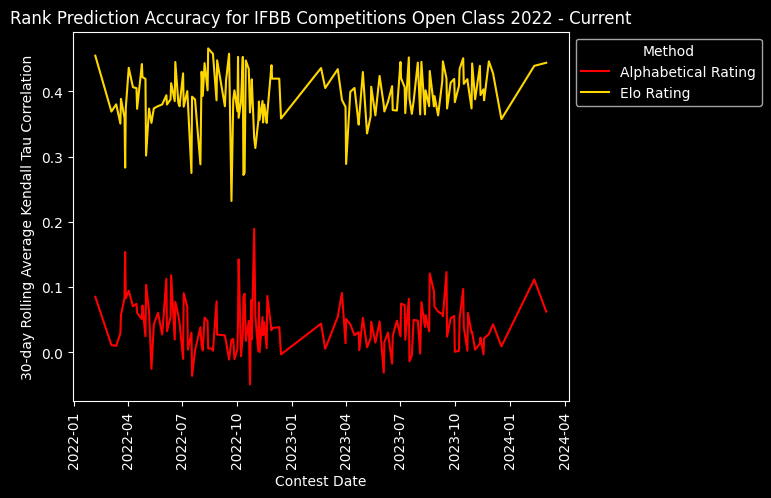

In [74]:
rg_palette = ["red", "gold"]
sns.set_palette(rg_palette)
ax = sns.lineplot(data=df_kt, x="date", y="Kendall Tau Correlation", hue="Method")
plt.xlabel("Contest Date")
plt.xticks(rotation=90)
plt.ylabel("30-day Rolling Average Kendall Tau Correlation")
plt.title("Rank Prediction Accuracy for IFBB Competitions Open Class 2022 - Current")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [95]:
df_pk = df_2223[
    ["date", "division", "30dayrollavg_prec_5_score", "30dayrollavg_prec_5_score_alpha"]
]

In [96]:
df_pk.head()

,date,division,30dayrollavg_prec_5_score,30dayrollavg_prec_5_score_alpha
99,2022-03-04,fitness,0.708333,0.500000
100,2022-03-12,fitness,0.708333,0.508333
101,2022-06-05,fitness,0.704348,0.513043
102,2022-06-18,fitness,0.700000,0.500000
103,2022-07-10,fitness,0.695238,0.495238


In [97]:
df_pk = pd.melt(
    df_pk,
    id_vars=["date", "division"],
    var_name="Method",
    value_name="Precision 5 Score",
).replace(
    to_replace={
        "30dayrollavg_prec_5_score": "Elo Rating",
        "30dayrollavg_prec_5_score_alpha": "Alphabetical Rating",
    }
)

In [98]:
df_pk.head()

,date,division,Method,Precision 5 Score
0,2022-03-04,fitness,Elo Rating,0.708333
1,2022-03-12,fitness,Elo Rating,0.708333
2,2022-06-05,fitness,Elo Rating,0.704348
3,2022-06-18,fitness,Elo Rating,0.700000
4,2022-07-10,fitness,Elo Rating,0.695238


We compare accuracy measurement of alphabetical ranking and elo ranking using Precision 5 score.

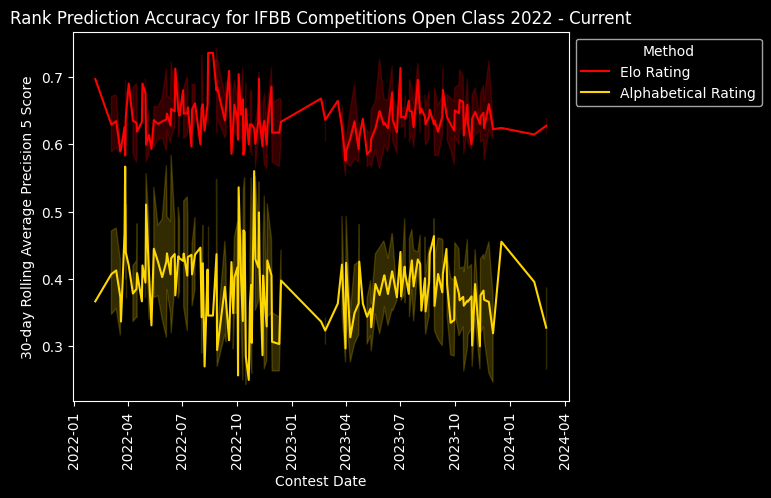

In [99]:
rg_palette = ["red", "gold"]
sns.set_palette(rg_palette)
ax = sns.lineplot(data=df_pk, x="date", y="Precision 5 Score", hue="Method")
plt.xlabel("Contest Date")
plt.xticks(rotation=90)
plt.ylabel("30-day Rolling Average Precision 5 Score")
plt.title("Rank Prediction Accuracy for IFBB Competitions Open Class 2022 - Current")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [83]:
df_sub = df[["contest_date", "competitor_name", "division", "class"]]

In [84]:
df_am = pd.merge(
    df_elo_adj[
        [
            "contest_date",
            "competitor_name",
            "division",
            "class",
            "elo_rating",
            "elo_rank",
        ]
    ],
    df_sub[df_sub["class"].str.contains("pro card")],
    how="inner",
    on=["contest_date", "competitor_name", "division"],
).drop_duplicates()

In [85]:
df_am["year"] = df_am["contest_date"].dt.year

We look at the elo ranking of people who qualified for pro card. Since there is not much information of amateur competitors, the winners tend to have low elo rating.

Text(0.5, 1.0, 'Elo Rating Prediction of Bikini IFBB Pro Card Winners')

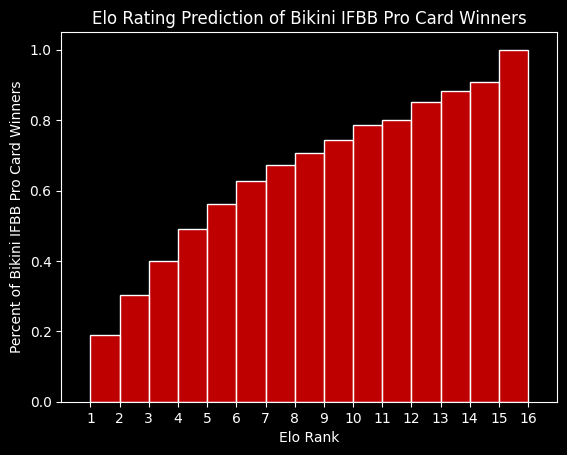

In [86]:
sns.histplot(
    df_am[(df_am["division"] == "bikini") & (df_am["year"] >= 2022)]["elo_rank"],
    bins=range(1, 17),
    stat="probability",
    cumulative=True,
)
plt.xlim(0, 17)
plt.xticks(range(1, 17))
plt.xlabel("Elo Rank")
plt.ylabel("Percent of Bikini IFBB Pro Card Winners")
plt.title("Elo Rating Prediction of Bikini IFBB Pro Card Winners")